# Enunciado:

Aplicar los algoritmos DBSCAN y DPC a los datos sintéticos que se proporcionan. Comparad el resultado obtenido con el real.

In [24]:
import pandas as pd
import numpy as np

df = pd.read_csv('csv/synthetic_data3.csv')
df.head()

,X1,X2
0,1.608417,1.685171
1,2.312804,-1.243635
2,2.676850,-1.740977
3,-1.238309,0.764010
4,-1.936576,-2.845153


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525 entries, 0 to 524
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      525 non-null    float64
 1   X2      525 non-null    float64
dtypes: float64(2)
memory usage: 8.3 KB


In [26]:
# Valores faltantes
df.isnull().sum()

X1    0
X2    0
dtype: int64

## DBSCAN

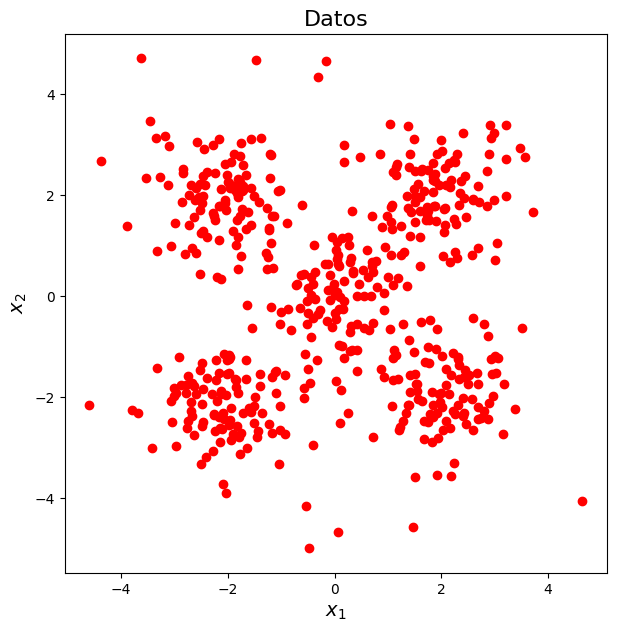

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 7))
plt.plot(df['X1'], df['X2'], 'ro')

plt.title("Datos", fontsize=16)
plt.xlabel(r"$x_1$", fontsize=14)
plt.ylabel(r"$x_2$", fontsize=14)
plt.show()

In [28]:
from sklearn.cluster import DBSCAN
import numpy

X = df.values.copy()
minPts = 11 # Puntos mínimos para formar el cluster
epsilon = 0.5 # Distancia máxima para que sean vecinos

dbscan = DBSCAN(eps=epsilon, min_samples=minPts)
labels = dbscan.fit_predict(df.values)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

print ('Número de clusters: %d' % n_clusters)

Número de clusters: 5


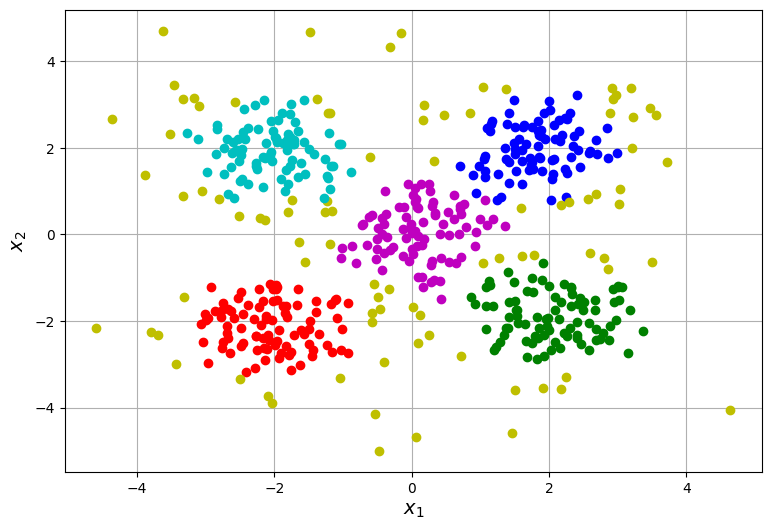

In [29]:
# Representación gráfica de la solución
# colors = 'bgrcmykbgrcmykbgrcmykbgrcmyk'
colors = 'bgrcmy'
plt.figure(figsize=(9, 6))
for i in range(len(X)):
    plt.plot(X[i][0], X[i][1], colors[labels[i]]+'o')
plt.xlabel(r"$x_1$", fontsize=14)
plt.ylabel(r"$x_2$", fontsize=14)
plt.grid()
plt.show()

## DPC

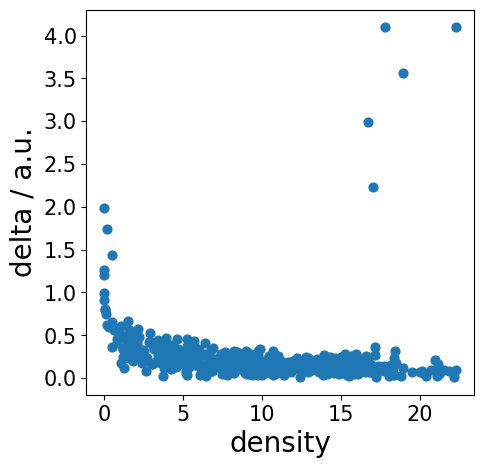

In [30]:
import pydpc
clu = pydpc.Cluster(X)

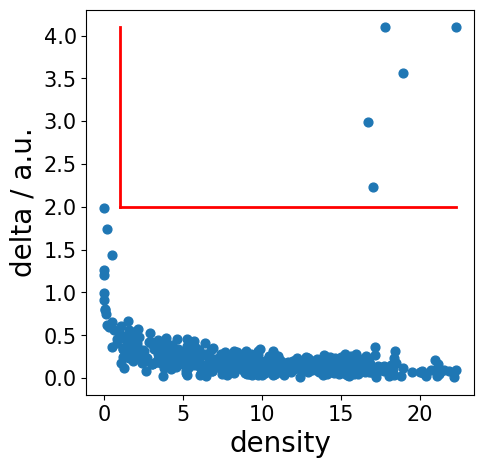

In [31]:
np.bool = bool  # necesario porque np.bool está obsoleto (deprecated)

# Definimos los valores rho y delta que nos permiten elegir los centros
rho = 1
delta = 2
clu.assign(rho, delta)

In [32]:
cluster_centers = clu.clusters # Obtener los centroides de los clusters
cluster_centers

array([ 73, 101, 183, 224, 233], dtype=int32)

In [33]:
labels = clu.membership # Obtener a que cluster pertenece cada grupo
labels

array([4, 0, 0, 1, 3, 3, 1, 1, 0, 1, 4, 1, 4, 0, 2, 0, 4, 4, 2, 2, 2, 2,
       4, 1, 2, 0, 4, 1, 0, 0, 2, 1, 1, 2, 2, 4, 4, 3, 2, 0, 3, 4, 3, 3,
       0, 2, 2, 2, 1, 1, 1, 1, 1, 0, 3, 3, 1, 3, 4, 2, 4, 0, 2, 1, 4, 1,
       1, 1, 4, 4, 4, 0, 4, 0, 3, 2, 3, 2, 4, 2, 2, 4, 1, 4, 2, 3, 1, 2,
       4, 4, 1, 1, 4, 1, 3, 1, 4, 0, 0, 3, 4, 1, 0, 1, 4, 1, 0, 4, 2, 2,
       0, 3, 0, 3, 1, 3, 4, 2, 0, 1, 0, 0, 4, 3, 1, 0, 2, 1, 2, 0, 3, 4,
       1, 0, 0, 1, 1, 2, 4, 2, 0, 0, 1, 4, 3, 1, 1, 1, 3, 4, 2, 0, 2, 2,
       4, 1, 3, 3, 2, 3, 4, 4, 0, 1, 2, 4, 0, 0, 3, 1, 3, 4, 4, 3, 4, 0,
       3, 0, 3, 2, 1, 2, 1, 2, 0, 1, 3, 4, 0, 2, 2, 2, 3, 1, 1, 0, 4, 2,
       3, 4, 2, 0, 0, 4, 4, 1, 3, 2, 1, 4, 1, 1, 0, 3, 0, 0, 3, 0, 2, 4,
       3, 3, 4, 1, 3, 1, 4, 1, 3, 3, 2, 4, 0, 4, 2, 4, 0, 0, 4, 0, 3, 3,
       1, 2, 0, 1, 4, 3, 2, 3, 2, 2, 3, 0, 2, 3, 3, 2, 0, 0, 3, 2, 1, 2,
       3, 0, 0, 2, 3, 0, 2, 2, 1, 2, 0, 2, 3, 1, 2, 4, 1, 3, 0, 4, 0, 3,
       2, 2, 0, 2, 2, 1, 2, 4, 1, 3, 2, 2, 4, 4, 3,

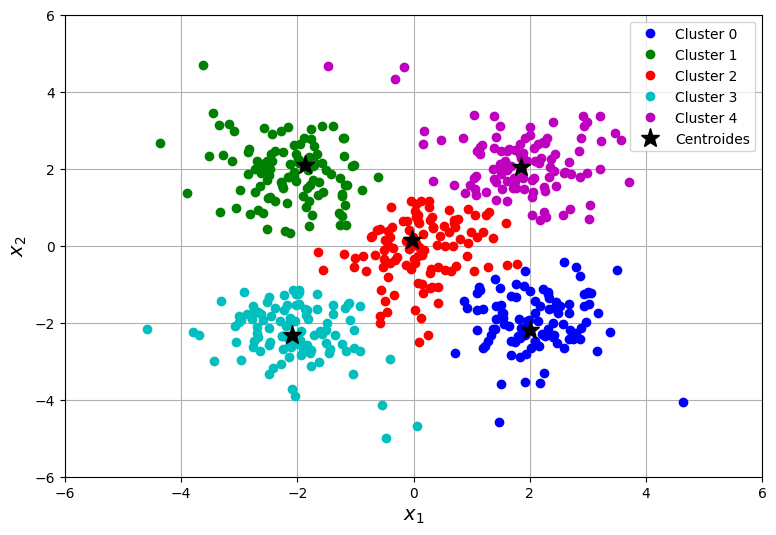

In [34]:
# Representación gráfica de la solución
import numpy
colors = 'bgrcmykbgrcmykbgrcmykbgrcmyk'
plt.figure(figsize=(9, 6))
for i in range(len(set(labels))):
      plt.plot(X[labels == i, 0], X[labels == i, 1], colors[i]+"o", label=f"Cluster {i}")
plt.plot(X[cluster_centers,0],X[cluster_centers,1], "k*", label="Centroides",markersize=14)
plt.xlabel(r"$x_1$", fontsize=14)
plt.ylabel(r"$x_2$", fontsize=14)
plt.legend()
plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.grid()
plt.show()

## Comparación con el real

In [35]:
df_real = pd.read_csv('csv/synthetic_data3_with_labels.csv')
df_real.head()

,X1,X2,Cluster
0,1.608417,1.685171,0
1,2.312804,-1.243635,2
2,2.676850,-1.740977,2
3,-1.238309,0.764010,3
4,-1.936576,-2.845153,1


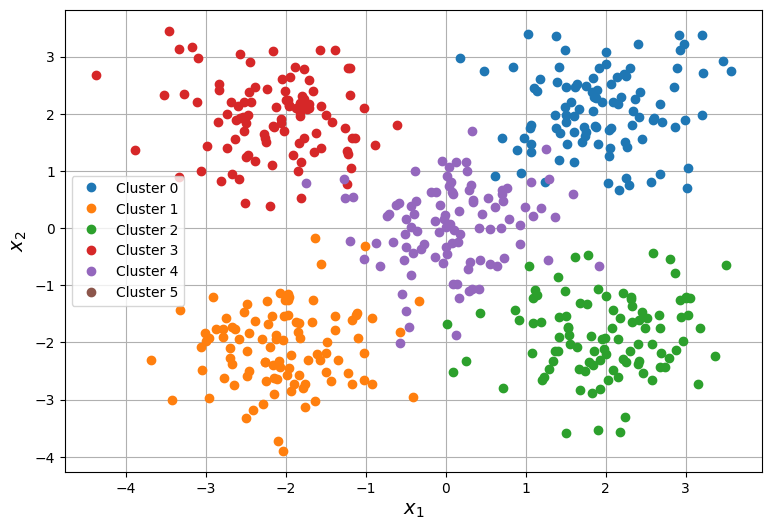

In [36]:
plt.figure(figsize=(9, 6))
for i in range(len(set(df_real['Cluster']))):
    plt.plot(df_real[df_real['Cluster'] == i]['X1'], df_real[df_real['Cluster'] == i]['X2'], 'o', label=f"Cluster {i}")
plt.xlabel(r"$x_1$", fontsize=14)
plt.ylabel(r"$x_2$", fontsize=14)
plt.legend()
plt.grid()
plt.show()